In [1]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

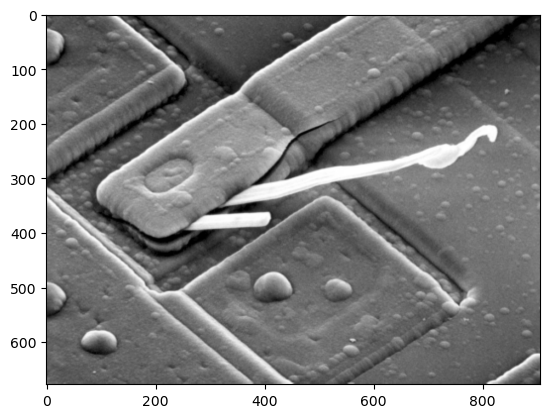

In [3]:
# a
img = cv2.imread(r"C:\Users\user\Desktop\master\DIP\integrated-ckt-damaged.tif")

plt.imshow(img) 
plt.show()

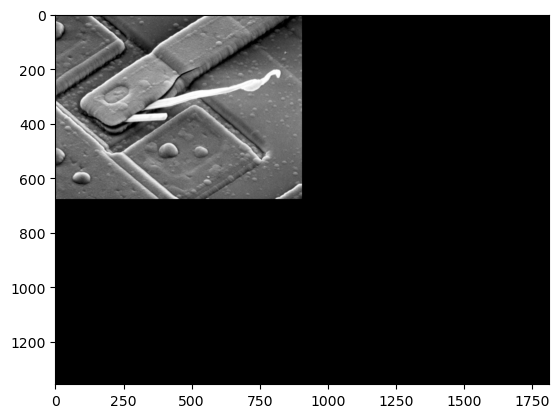

In [46]:
# b
img = cv2.imread(r"C:\Users\user\Desktop\master\DIP\integrated-ckt-damaged.tif")

r = img.shape[0]
c = img.shape[1]

#imga = cv2.copyMakeBorder(img, 0, 678 , 0, 906,cv2.BORDER_CONSTANT, value=0)
imgb = cv2.copyMakeBorder(img, 0, r , 0, c,cv2.BORDER_CONSTANT, value=0)

plt.imshow(imgb) 
plt.show()

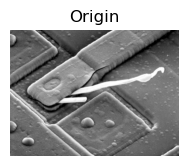

In [51]:
#a
imgGray = cv2.imread(r"C:\Users\user\Desktop\master\DIP\integrated-ckt-damaged.tif", flags=0)  # flags=0 read as grayscale image
    
fig = plt.figure(figsize=(10, 6))
plt.subplot(241), plt.axis('off'), plt.title("Origin")
plt.imshow(imgGray, cmap='gray')

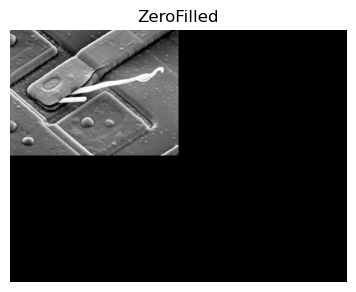

In [52]:
#b
H, W = imgGray.shape[:2]  
P, Q = 2*H, 2*W
fp = np.pad(imgGray, ((0,H), (0,W)), mode='constant') 
fig = plt.figure(figsize=(20, 12))
plt.subplot(242), plt.axis('off'), plt.title("ZeroFilled")
plt.imshow(fp, cmap='gray')

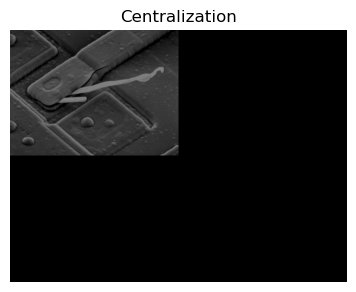

In [53]:
#c
mask = np.ones(fp.shape)
mask[1::2, ::2] = -1
mask[::2, 1::2] = -1
fpCen = fp * mask
fpCenShow = np.clip(fpCen, 0, 255)  # Truncation function, limiting the value to [0255]
#print("fpCenShow.shape", fpCenShow.shape, fpCenShow.min(), fpCenShow.max())
fig = plt.figure(figsize=(20, 12))
plt.subplot(243), plt.axis('off'), plt.title("Centralization")
plt.imshow(fpCenShow, cmap='gray')

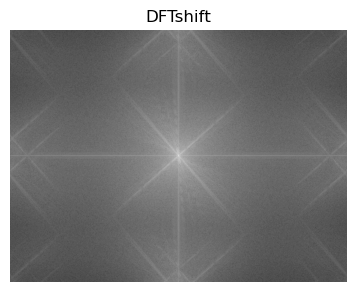

In [43]:
#d
imgFloat32 = np.float32(fp)  # Convert image to float32
dft = cv2.dft(imgFloat32, flags=cv2.DFT_COMPLEX_OUTPUT)  # Fourier transform
dftShift = np.fft.fftshift(dft)  # Move the low-frequency component to the center of the frequency domain image
dftShiftAmp = cv2.magnitude(dftShift[:,:,0], dftShift[:,:,1])  # Amplitude spectrum, centralization
dftAmpLog = np.log(1 + dftShiftAmp)  # Logarithmic transformation of amplitude spectrum for easy display
fig = plt.figure(figsize=(20, 12))
plt.subplot(244), plt.axis('off'), plt.title("DFTshift")
plt.imshow(dftAmpLog, cmap='gray')

maskGauss.shape (1356, 1812) 0 255


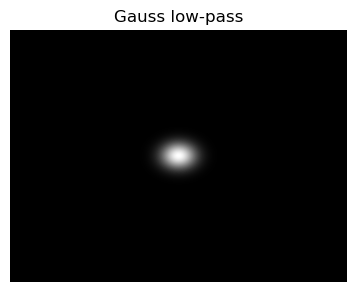

In [44]:
#e
sigma2 = 0.005  # square of sigma
x, y = np.mgrid[-1:1:1.0/H, -1:1:1.0/W]
z = 1 / (2 * np.pi * sigma2) * np.exp(-(x**2 + y**2) / (2*sigma2))
    # maskGauss = np.uint8(255 * (z - z.min()) / (z.max() - z.min()))
maskGauss = np.uint8(cv2.normalize(z, None, 0, 255, cv2.NORM_MINMAX))  # Normalized to [0255]
fig = plt.figure(figsize=(20, 12))
print("maskGauss.shape", maskGauss.shape, maskGauss.min(), maskGauss.max())
plt.subplot(245), plt.axis('off'), plt.title("Gauss low-pass")
plt.imshow(maskGauss, cmap='gray')

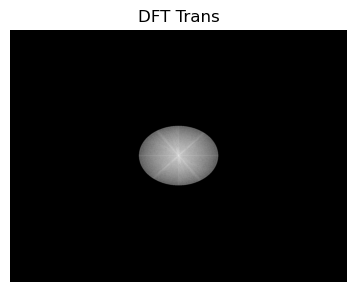

In [45]:
#f
maskGauss2 = np.zeros((maskGauss.shape[0], maskGauss.shape[1], 2), np.uint8)
maskGauss2[:, :, 0] = maskGauss
maskGauss2[:, :, 1] = maskGauss
dftTrans = dftShift * maskGauss2  # Modified Fourier transform to realize filtering
dftTransAmp = cv2.magnitude(dftTrans[:,:,0], dftTrans[:,:,1])  # Amplitude, centration, spectrum
dftTransLog = np.log(1 + dftTransAmp)  # Logarithmic transformation of amplitude spectrum for easy display
fig = plt.figure(figsize=(20, 12))
plt.subplot(246), plt.axis('off'), plt.title("DFT Trans")
plt.imshow(dftTransLog, cmap='gray')

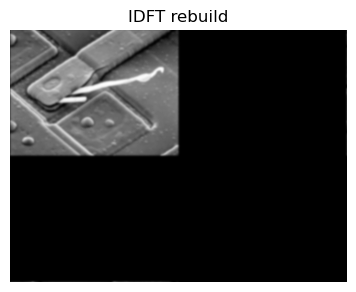

In [46]:
#g
ishift = np.fft.ifftshift(dftTrans)  # Switch the low-frequency reversal back to the four corners of the image
idft = cv2.idft(ishift)  # Inverse Fourier transform
idftMag = cv2.magnitude(idft[:,:,0], idft[:,:,1])  # Reconstructed image
fig = plt.figure(figsize=(20, 12))
plt.subplot(247), plt.axis('off'), plt.title("IDFT rebuild")
plt.imshow(idftMag, cmap='gray')

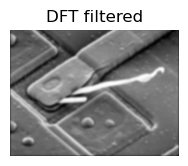

In [47]:
#h
fig = plt.figure(figsize=(10, 6))
imgRebuild = idftMag[:H, :W]
plt.subplot(248), plt.axis('off'), plt.title("DFT filtered")
plt.imshow(imgRebuild, cmap='gray')

fpCenShow.shape (1356, 1812) 0.0 255.0
maskGauss.shape (1356, 1812) 0 255


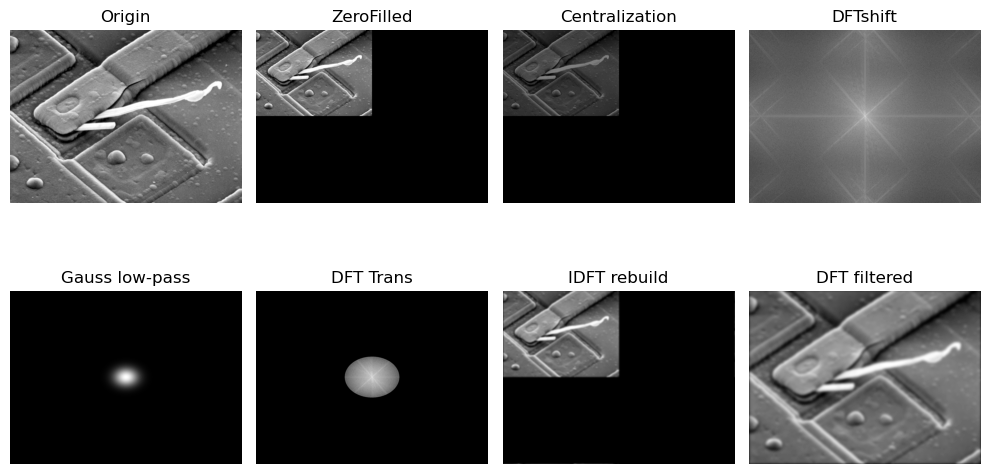

In [4]:
# # 8.15: general steps of image filtering in frequency domain (this example corresponds to figure 4.35 of P183 in the fourth edition of Gonzalez Digital Image Processing)
imgGray = cv2.imread(r"C:\Users\user\Desktop\master\DIP\integrated-ckt-damaged.tif", flags=0)  # flags=0 read as grayscale image
H, W = imgGray.shape[:2]  # Height (H) and width (W) of the picture
P, Q = 2*H, 2*W
    # centerY, centerX = int(H/2), int(W/2)  # Picture center
fig = plt.figure(figsize=(10, 6))

    # Here, the original image is pad to get better display
imgDouble = np.ones([2*H, 2*W]) * 255
imgDouble[:H, W:] = imgGray # The original image is on the upper right
plt.subplot(241), plt.axis('off'), plt.title("Origin")
# plt.imshow(imgDouble, cmap='gray')
plt.imshow(imgGray, cmap='gray')

fp = np.pad(imgGray, ((0,H), (0,W)), mode='constant')  # Zero fill
plt.subplot(242), plt.axis('off'), plt.title("ZeroFilled")
plt.imshow(fp, cmap='gray')

    # Centralization
mask = np.ones(fp.shape)
mask[1::2, ::2] = -1
mask[::2, 1::2] = -1
fpCen = fp * mask
fpCenShow = np.clip(fpCen, 0, 255)  # Truncation function, limiting the value to [0255]
print("fpCenShow.shape", fpCenShow.shape, fpCenShow.min(), fpCenShow.max())
plt.subplot(243), plt.axis('off'), plt.title("Centralization")
plt.imshow(fpCenShow, cmap='gray')

    # cv2. Fourier transform of image based on DFT
imgFloat32 = np.float32(fp)  # Convert image to float32
dft = cv2.dft(imgFloat32, flags=cv2.DFT_COMPLEX_OUTPUT)  # Fourier transform
dftShift = np.fft.fftshift(dft)  # Move the low-frequency component to the center of the frequency domain image
dftShiftAmp = cv2.magnitude(dftShift[:,:,0], dftShift[:,:,1])  # Amplitude spectrum, centralization
dftAmpLog = np.log(1 + dftShiftAmp)  # Logarithmic transformation of amplitude spectrum for easy display
plt.subplot(244), plt.axis('off'), plt.title("DFTshift")
plt.imshow(dftAmpLog, cmap='gray')

    # Gauss low_pass filter: 1/(2*pi*s2) * exp(-(x**2+y**2)/(2*s2))
sigma2 = 0.005  # square of sigma
x, y = np.mgrid[-1:1:1.0/H, -1:1:1.0/W]
z = 1 / (2 * np.pi * sigma2) * np.exp(-(x**2 + y**2) / (2*sigma2))
    # maskGauss = np.uint8(255 * (z - z.min()) / (z.max() - z.min()))
maskGauss = np.uint8(cv2.normalize(z, None, 0, 255, cv2.NORM_MINMAX))  # Normalized to [0255]
print("maskGauss.shape", maskGauss.shape, maskGauss.min(), maskGauss.max())
plt.subplot(245), plt.axis('off'), plt.title("Gauss low-pass")
plt.imshow(maskGauss, cmap='gray')

maskGauss2 = np.zeros((maskGauss.shape[0], maskGauss.shape[1], 2), np.uint8)
maskGauss2[:, :, 0] = maskGauss
maskGauss2[:, :, 1] = maskGauss
dftTrans = dftShift * maskGauss2  # Modified Fourier transform to realize filtering
dftTransAmp = cv2.magnitude(dftTrans[:,:,0], dftTrans[:,:,1])  # Amplitude, centration, spectrum
dftTransLog = np.log(1 + dftTransAmp)  # Logarithmic transformation of amplitude spectrum for easy display
plt.subplot(246), plt.axis('off'), plt.title("DFT Trans")
plt.imshow(dftTransLog, cmap='gray')

    # Return to spatial domain through inverse Fourier transform
ishift = np.fft.ifftshift(dftTrans)  # Switch the low-frequency reversal back to the four corners of the image
idft = cv2.idft(ishift)  # Inverse Fourier transform
idftMag = cv2.magnitude(idft[:,:,0], idft[:,:,1])  # Reconstructed image
plt.subplot(247), plt.axis('off'), plt.title("IDFT rebuild")
plt.imshow(idftMag, cmap='gray')

imgRebuild = idftMag[:H, :W]
plt.subplot(248), plt.axis('off'), plt.title("DFT filtered")
plt.imshow(imgRebuild, cmap='gray')

plt.tight_layout()
plt.show()